# 분자 표현형

- 화합물에 대한 정보를 컴퓨터가 인식할 수 있도록 숫자로 표현하는 것을 분자 표현이라고 한다(Data Representation)
- 분자를 표현하는 방법은 SMILES, Mol 블록 파일, Descriptor 테이블, Fingerprint, 그래프 모델 등이 있다
- [RDKit](https://www.rdkit.org/docs/index.html)을 이용해서 화합물의 여러가지 표현형을 다루는 법을 배운다
- RDKit은 화합물의 여러 특성을 파악하고, 표현형을 바꾸고, 속성을 예측하는데 널리 사용되는 cheminformatics와 머신 러닝용 파이썬 패키지이다

## 머신러닝과 데이터 표현형

- 현재 인공지능(artificial intelligence)을 구현하는 주요 기술은 머신러닝(machine learning)이다
- 머신러닝은 "데이터 기반"의 모델을 사용하며 데이터를 보고 학습을 하여 모델의 성능을 점차 높이는 방식이다
- 신약 후보물질을 찾거나, 리드 최적화를 하는 과정은 분자, 단백질 등 대상 물질의 특성을 잘 찾는 작업을 필요로 한다
- 머신러닝의 성능은 입력 데이터 즉, 분자의 특성 등을 얼마나 잘 표현하는가에 따라 크게 달라진다


## QSAR
- 분자의 구조적 특성으로부터 분자의 물리적, 화학적, 생화학적인 속성값(property)을 예측하는 작업을 QSAR (quantitative structure-activity relationship) 분석이라고 한다

- 이를 위해 지금까지는 화학적, 물리학적, 수학적인 이론에 근거해서 예측 모델을 만들었으나 이러한 수식, 지식 또는 논리 기반의 모델은 복잡한 실제 세계를 모델링하는데 한계가 있다
- 머신러닝은 분자의 물리, 화학, 생물학적인 작용을 예측하기 위해서 데이터 기반의 모델을 사용하는 것이다




## 분자 표현형 종류

- 딥러닝 모델 이전의 전통적인 머신러닝 모델(선형모델, 결정트리, 랜덤포레스트 등)은 기본적으로 분자 표현형으로 2차원 테이블 구조를 사용한다
 - 행은 샘플을 나타내고 열(컬럼)을 특성을 나타낸다
 - 전문가가 각 분석 목적에 필요한 적절한 컬럼(특성)을 선택하는 것이 중요한 작업이었다
 - 특성 표현형으로는 Descriptors, Mol 파일, fingerprint 등이 널리 사용되었다
- 딥러닝 모델에서는 분자 표현형으로 그래프 모델, 임베딩 벡터 등 더 다양한 표현형이 사용된다


## SMILES
- Simplified Molecular Input Line Entry System
- 간단한 분자 표현 방식으로 분자를 구성하는 원자는 알파벳으로 된 원자 기호를 사용한다 (B,C,N,O,S,F,Cl,Br,I 등)
 - 두 글자로 된 원자는 [ ]로 표현한다([Au],[Ag],[Se] 등)
-  결합은, Single bonds는 생략하고 double, triple, quadruple bond는 각각 '=', '#', '$' 로 표현한다
- 링구조는 시작과 끝 원자에 숫자를 붙인다
- 아로마틱 원자는 소문자로 표현한다: b, c, n, o, p, s 등
- 수소 원자는 생략한다
- 예:

<img src="http://www.daylight.com/dayhtml/doc/theory/theory4.gif"/>

- SMILES의 장점:
 - 읽기 쉽고 사람이 작성하기도 쉽다
 - 텍스트 문장처럼 문자열 처리 방식을 적용할 수 있다

- 단점:
 - 분자의 공간적인 정보는 표현하지 못한다
 - 동일한 분자에 대해서도 서로 다른 다양한 표현법이 있을 수 있다
- 상세한 정보는 [Daylight Theory Manual](https://www.daylight.com/dayhtml/doc/theory/) 참조

# import

- 화합물을 다루는 파이썬의 rdkit 패키지를 사용한다

!pip install rdkit

In [10]:
!pip install rdkit

In [9]:
!pip install deepchem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.3 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
import deepchem as dc

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


# mol 객체

- SMILES는 사람이 보기 편한 표현형이고, 파이썬 프로그램에서는 SMILES로부터 직접 정보를 얻을 수 없다 (숫자가 아니므로)
- 파이썬에서는 하나의 분자를 표현하는데 mol 객체를 사용한다
- SMILES로부터 mol 객체를 얻으려면 MolFromSmiles 함수를 사용한다

In [12]:
aspirin_mol = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
print(type(aspirin_mol))

<class 'rdkit.Chem.rdchem.Mol'>


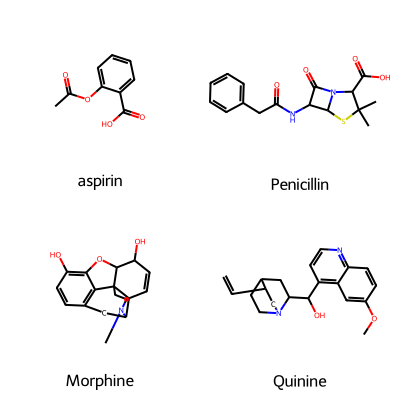

In [13]:
# aspirin, Penicillin, Morphine, Quinine의 SMILES 데이터를 딕셔너리로 저장
smiles_dict = {'aspirin' : 'CC(=O)OC1=CC=CC=C1C(=O)O',
 'Penicillin' : 'CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C',
 'Morphine' : 'CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(C=C4)O',
 'Quinine' : 'COC1=CC2=C(C=CN=C2C=C1)C(C3CC4CCN3CC4C=C)O'}

# 딕셔너리의 value들(SMILES 데이터)을 통해 mol 객체 리스트 생성
mol_list = list(map(Chem.MolFromSmiles, smiles_dict.values()))

# Draw.MolsToGridImage() 함수에 mol 객체 리스트 입력 후 각 설정 입력
mol_img = Draw.MolsToGridImage(mol_list,
                                   molsPerRow=2,
                                   legends=smiles_dict.keys())

# 이미지 출력
mol_img

# Mol 블록 파일

- Mol 블록 파일은 분자에 대한 상세한 정보를 텍스트 파일로 표현하며 분자를 구성하는 원자, 결합, 좌표정보 등을 포함한다
- Chem 모듈이 제공하는 MolToMolBlock 함수로 Mol 블로 파일을 얻을 수 있다

In [14]:
propane = Chem.MolFromSmiles("CCC")
print(Chem.MolToMolBlock(propane))


     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END



## Mol 블록 저장하기

- Mol 블록을 텍스트 파일로 저장하기

In [15]:
# 하나의 Mol block file을 .mol 파일로 저장하기
with Chem.SDWriter('propane.mol') as w:
    w.write(propane)

In [16]:
# 저장된 mol 파일 확인하기
!head propane.mol


     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END


- 다수의 SMILES, mol 객체, mol 블록 파일 다루기
- 딕셔너리를 사용하겠다

In [17]:
# 1. Glycine, Phenylalanine, Histidine, Cysteine의 SMILES를 담은 딕셔너리
smiles_dict = { 'Glycine' : 'C(C(=O)O)N',
                'Phenylalanine' : 'N[C@@H](CC1=CC=CC=C1)C(O)=O',
                'Histidine' : 'O=C([C@H](CC1=CNC=N1)N)O',
                'Cysteine' : 'C([C@@H](C(=O)O)N)S'}

# 2. Glycine, Phenylalanine, Histidine, Cysteine의 mol 객체를 담은 딕셔너리
mol_dict = {}
for molecule in smiles_dict.keys():
    mol = Chem.MolFromSmiles(smiles_dict[molecule])
    mol_dict[molecule] = mol

# 3. 딕셔너리에 있는 여러 화합물을 Mol block file을 .sdf 파일로 저장하기
with Chem.SDWriter(f'ALL.sdf') as w:
    for molecule in mol_dict.keys():
        w.write(mol_dict[molecule])

In [18]:
# 저장된 sdf 파일 확인하기
!head -30 ALL.sdf


     RDKit          2D

  5  4  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    2.2500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  2  4  1  0
  1  5  1  0
M  END
$$$$

     RDKit          2D

 12 12  0  0  0  0  0  0  0  0999 V2000
    3.0000   -2.5981    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0

# Descriptors

- 분자가 가지고 있는 물리, 화학적인 특성 값을 사용하는 방법
- 분자량, 용해도, 독성, 3차원 정보, 질량, 극성, 아로마틱 등을 사용한다
- 분석 목적에 따라 필요한 특성을 선택(feature selection)하거나 특성 변환 등 데이터 전처리가 필요하다


In [19]:
# aspirin의 Smiles 데이터 사용
aspirin_mol = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
# 분자량
print(f'aspirin의 분자량 : ', Descriptors.MolWt(aspirin_mol))
print(f'aspirin의 LogP : ', Descriptors.MolLogP(aspirin_mol))

aspirin의 분자량 :  180.15899999999996
aspirin의 LogP :  1.3101


In [20]:
aspirin_mol = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
all_descriptors = Descriptors.CalcMolDescriptors(aspirin_mol)
print(all_descriptors)

{'MaxAbsEStateIndex': 10.611948223733938, 'MaxEStateIndex': 10.611948223733938, 'MinAbsEStateIndex': 0.01601851851851821, 'MinEStateIndex': -1.1140277777777776, 'qed': 0.5501217966938848, 'SPS': 9.307692307692308, 'MolWt': 180.15899999999996, 'HeavyAtomMolWt': 172.09499999999997, 'ExactMolWt': 180.042258736, 'NumValenceElectrons': 68, 'NumRadicalElectrons': 0, 'MaxPartialCharge': 0.33900378687731025, 'MinPartialCharge': -0.4775395271554559, 'MaxAbsPartialCharge': 0.4775395271554559, 'MinAbsPartialCharge': 0.33900378687731025, 'FpDensityMorgan1': 1.3076923076923077, 'FpDensityMorgan2': 1.9230769230769231, 'FpDensityMorgan3': 2.4615384615384617, 'BCUT2D_MWHI': 16.53611122125433, 'BCUT2D_MWLOW': 10.182282381035343, 'BCUT2D_CHGHI': 2.104306980957856, 'BCUT2D_CHGLO': -2.0311320919470135, 'BCUT2D_LOGPHI': 2.1698345568128055, 'BCUT2D_LOGPLOW': -2.063000061964296, 'BCUT2D_MRHI': 5.913065796110142, 'BCUT2D_MRLOW': -0.13141434244030561, 'AvgIpc': 2.0325369160995868, 'BalabanJ': 3.043527354634101

[00:26:58] DEPRECATION WARNING: please use MorganGenerator
[00:26:58] DEPRECATION WARNING: please use MorganGenerator
[00:26:58] DEPRECATION WARNING: please use MorganGenerator


## Fingerprint 비트 정보 보기
- MorganFingerprint 특정 위치의 값이 1이면 어떤 특성을 포함하고 있는지를 알려준다
- GetOnBits() 함수 사용

In [21]:
# 빈 딕셔너리 bi를 생성합니다. 이 딕셔너리는 각 비트가 어떤 원자와 반경에 의해 설정되었는지에 대한 정보를 저장하는데 사용됩니다.
bi= {}

# SMILES 표기법을 사용하여 아스피린 분자를 생성합니다.
aspirin_mol = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")

# 아스피린 분자의 모건 지문을 계산합니다. 여기서 반경은 2, 비트 벡터의 길이는 1024로 설정되었습니다.
fp = AllChem.GetMorganFingerprintAsBitVect(aspirin_mol, 2, nBits=1024, bitInfo=bi)

# MorganFingerprint 객체를 numpy array로 변환하여 fp_arr에 저장합니다.
fp_arr = np.array(fp, dtype=float)

# MorganFingerprint 객체를 출력합니다.
print(fp)

# numpy 배열로 변환된 MorganFingerprint의 처음 100개 요소를 출력합니다.
print(fp_arr[:100])

# fp_arr내의 0이 아닌 값의 위치(index)를 알려줍니다.
print(np.nonzero(fp_arr))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
(array([  11,   23,   33,   64,  175,  356,  386,  389,  423,  444,  456,
        592,  650,  695,  705,  726,  751,  807,  849,  893,  909,  946,
        967, 1017]),)


[00:26:58] DEPRECATION WARNING: please use MorganGenerator


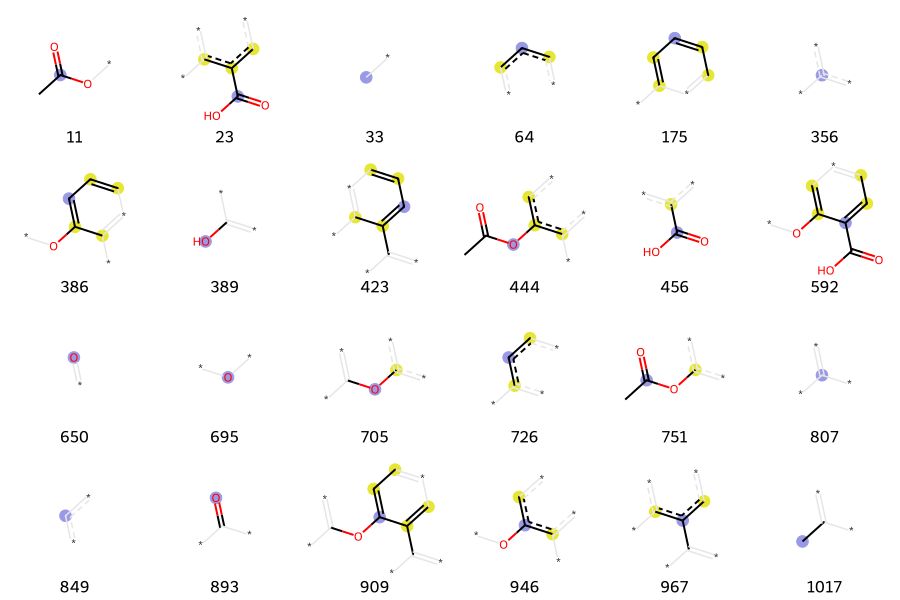

In [22]:
points = [(aspirin_mol, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(points, molsPerRow=6, legends = [str(x) for x in fp.GetOnBits()])

In [23]:
# 아스피린의 mol 객체
aspirin_mol = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")

# 분자를 그래프 표현형으로 바꾸어주는 함수
featurizer = dc.feat.ConvMolFeaturizer()

# 아스피린 mol 객체를 함수에 입력하여 그래프 데이터를 얻음
graph_mol = featurizer.featurize(aspirin_mol)

# 반환된 그래프 데이터 출력
print(graph_mol)

# 그래프 표현형

- 분자를 구성하는 원자와 결합을 노드와 엣지로 표현하는 방식이다
- 최근 딥러닝 모델의 입력으로 그래프 표현형이 널리 사용되고 있다
- 딥러닝 모델로는 그래프 컨볼류션 네크워크(Graph Convolutio Network)를 사용한다

![분자 그래프](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/basic_graphs.gif?raw=1)

In [24]:
#　feature matrix의 shape을 출력 (13개의 원자와 길이 75의 특성 벡터를 확인)
print('feature matrix의 shape \n', graph_mol[0].atom_features.shape, end='\n\n')

# feature matrix의 길이가 길기 때문에 3번째 원자 까지만 출력
print('3번째 원자까지의 feature matrix \n', graph_mol[0].atom_features[:3], end='\n\n')

# 원자들의 연결 정보를 담고 있는 adjacency list 출력
print('adjacency list \n', graph_mol[0].get_adjacency_list(), end='\n\n')

# 결합된 인근 원자의 수를 나타내는 degree list 출력
print('degree list \n', graph_mol[0].degree_list, end='\n\n')


feature matrix의 shape 
 (13, 75)

3번째 원자까지의 feature matrix 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
  0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
  0. 0. 0.]]

adjacency list 
 [[9], [9], [12], [12], [9, 10], [10, 6], [5, 7], [6, 8], [7, 11], [0, 1, 4], [4, 5, 11], [8, 12, 10], [11, 2, 3]]

degree list 
 [1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3]

